ALP Data Mining 

Nama : Ariel Cristo Haryono
NIM  : 0706022110032

What you have to do...
Perform data preparations to clean data
Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
Cluster the data using K-Means, Hierarchical Clustering
Create a prediction model using any classification algorithm and compare the results
Submit your result through Github with the code run and showing results

Load Dataset

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Ariel\Documents\KULIAH\Semester 5\Data mining B\Student_Prediction\data.csv", sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Data Preparation adn Cleaning

In [2]:
duplicate = df.duplicated().sum()
duplicate

0

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Info:")
print(df.info())

# Display summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification     

In [4]:
# Cek missing value
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [5]:
from sklearn.preprocessing import LabelEncoder
df = df.drop(['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification (grade)', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date' ], axis=1)
df['Target'] = LabelEncoder().fit_transform(df['Target'])
df.head()

,Marital status,Previous qualification,Nacionality,Admission grade,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,127.3,1,0,20,0,0,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,1,1,142.5,1,0,19,0,0,6,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,1,124.8,1,0,19,0,0,6,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,1,1,119.6,0,0,20,0,0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,1,1,141.5,0,0,45,0,0,6,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


EDA

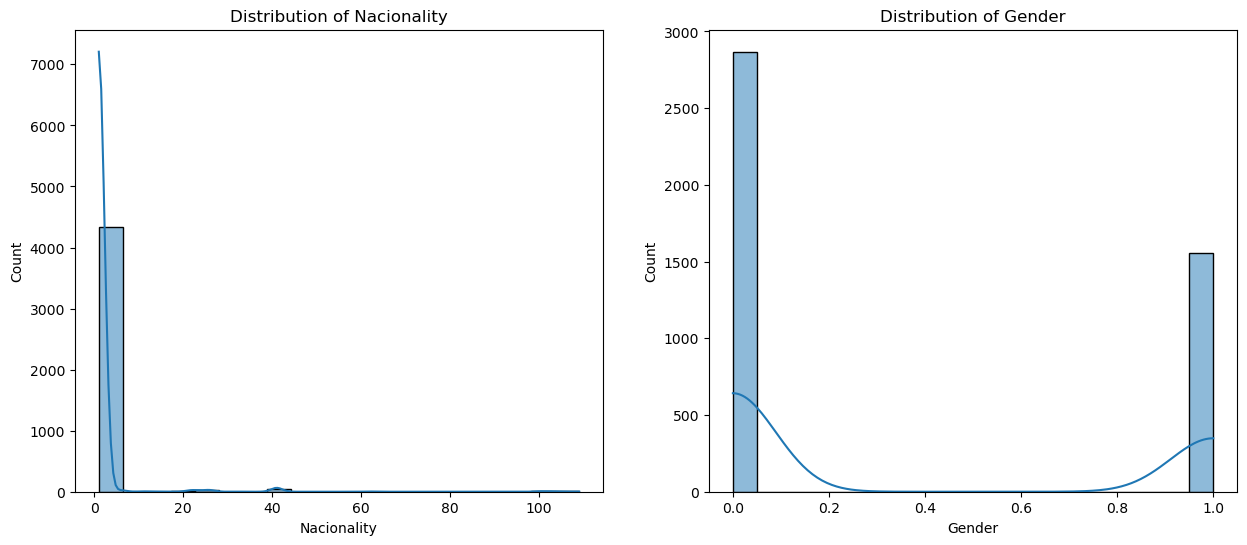

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Nacionality'], bins=20, kde=True)
plt.title('Distribution of Nacionality')
plt.subplot(1, 2, 2)
sns.histplot(df['Gender'], bins=20, kde=True)
plt.title('Distribution of Gender')
plt.show()

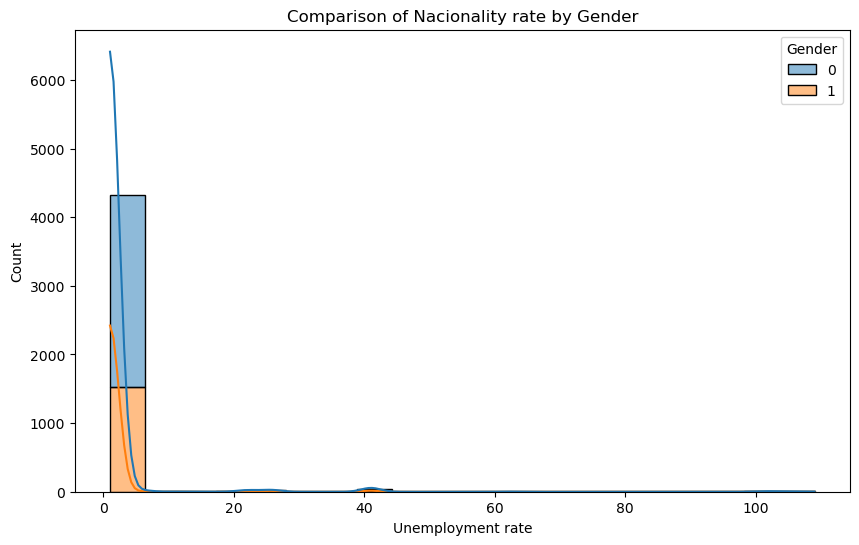

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Nacionality', hue='Gender', multiple="stack", bins=20, kde=True)
plt.title('Comparison of Nacionality rate by Gender')
plt.xlabel('Unemployment rate')
plt.ylabel('Count')
plt.show()

K-Means Clustering

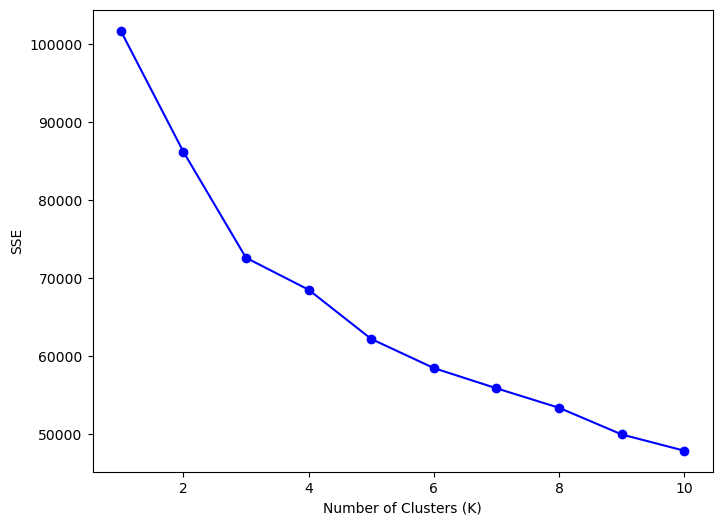

Best cluster is : 5


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
cluster_data = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Target'], errors='ignore')

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Initialize a list to store the inertia values for different numbers of clusters
inertia_values = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.show()
findknee = KneeLocator(range(1, 11),
                       inertia_values,
                       curve="convex",
                       direction="decreasing")
print('Best cluster is :', findknee.elbow)

In [9]:
best_kmeans = KMeans(n_clusters=findknee.elbow, n_init=10, random_state=42)  
best_kmeans.fit(cluster_data)
df['Kmeans Cluster'] = best_kmeans.labels_

Hierarchical Clustering

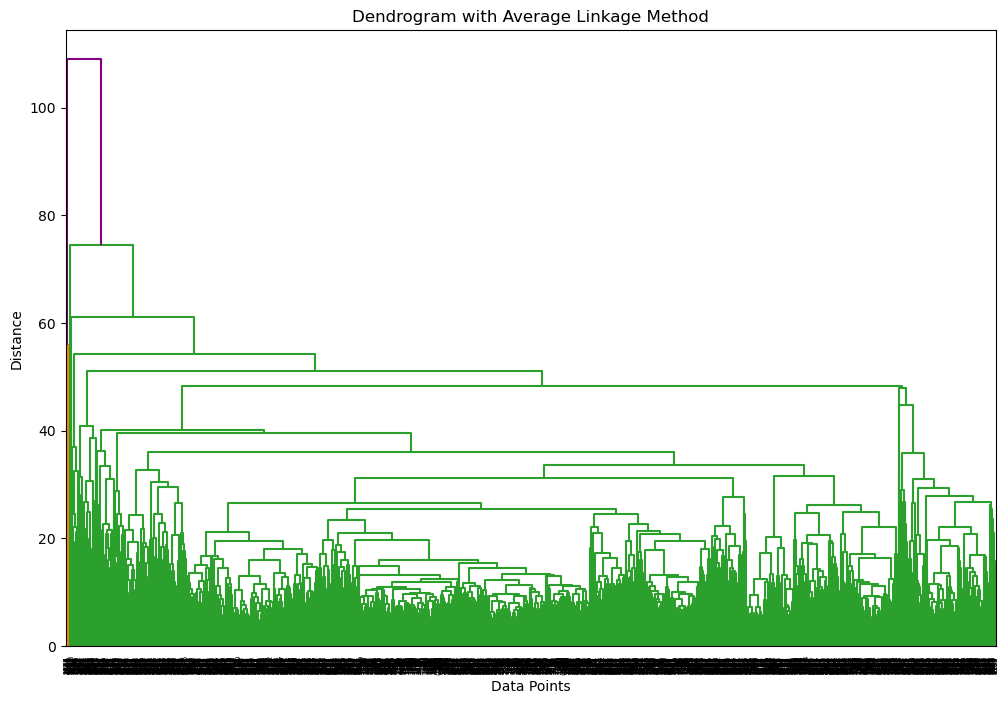

In [10]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(data, method='average', metric='euclidean', figsize=(12, 8), p=30, truncate_mode='level', show_leaf_counts=True, above_threshold_color='purple', title='Dendrogram with Average Linkage Method', xlabel='Data Points', ylabel='Distance'):
    linkage_matrix = linkage(data, method=method, metric=metric)
    
    plt.figure(figsize=figsize)
    dendrogram(linkage_matrix, orientation='top', p=p, truncate_mode=truncate_mode, show_leaf_counts=show_leaf_counts, above_threshold_color=above_threshold_color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Assuming df is defined somewhere in your code
column_to_drop = 'K-Means'
data_for_dendrogram = df.drop(column_to_drop, axis=1, errors='ignore')  # Ignore errors if the column doesn't exist
plot_dendrogram(data_for_dendrogram, method='average')


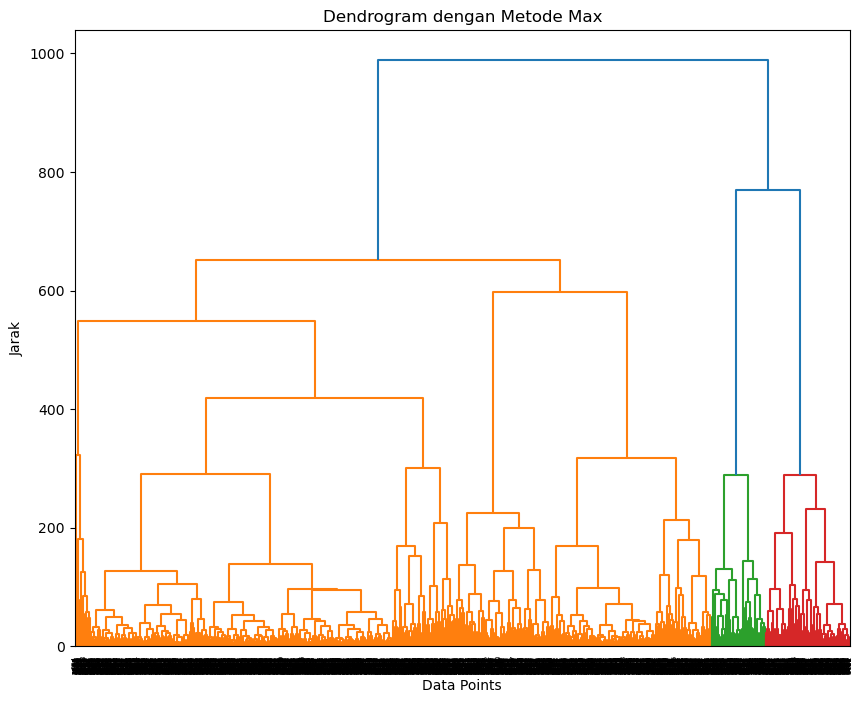

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data_for_dendrogram = df.drop('Kmeans Cluster', axis=1) 

linkage_matrix = linkage(data_for_dendrogram, method='ward', metric='euclidean')

plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, orientation='top', p=30, truncate_mode='level', show_leaf_counts=True)
plt.title('Dendrogram dengan Metode Max')
plt.xlabel('Data Points')
plt.ylabel('Jarak')
plt.show()

Logistic Regression

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
X = df.drop("Target", axis=1)
Y = df["Target"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg

LogisticRegression()

In [15]:
y_pred = logreg.fit(scaled_X_train, Y_train).predict(scaled_X_test)
y_pred

array([2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,
       0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0,

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion_matrix:",(confusion_matrix(Y_test,y_pred)))
print("Accuracy score: ",(accuracy_score(Y_test,y_pred)))

confusion_matrix: [[221  23  40]
 [ 45  48  58]
 [ 19  16 415]]
Accuracy score:  0.7728813559322034


KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn 

KNeighborsClassifier()

In [18]:
knn = knn.fit(scaled_X_train, Y_train).predict(scaled_X_test)

c:\Users\Ariel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [19]:
print("confusion_matrix:",(confusion_matrix(Y_test,knn)))
print("Accuracy score: ",(accuracy_score(Y_test,knn)))

confusion_matrix: [[204  33  47]
 [ 53  46  52]
 [ 33  41 376]]
Accuracy score:  0.7073446327683616


Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [21]:
y_pred = gnb.predict(X_test)
y_pred

array([2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2,
       0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0,

In [22]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.6949


Tingkat akurasi paling tinggi ialah Losgistic Regression, KNN, Naive Bayes